# Botnet flow and profiling

In [13]:
# IMPORTS"
%matplotlib inline 
from pprint import pprint
from collections import Counter
import random
import time
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import islice

In [2]:
scenario_10 = 'capture20110818.pcap.netflow.labeled'


def parse_line(split_line):
    src = split_l[3].split(':')
    dst = split_l[5].split(':')

    return {
        'datetime': split_l[0],
        'duration': split_l[1],
        'protocol': split_l[2],
        'src_ip': src[0],
        'src_port': '' if len(src) == 1 else src[1],
        'dst_ip': dst[0],
        'dst_port': '' if len(dst) == 1 else src[1],
        'flags': split_l[6],
        'tos': split_l[7],
        'packets': int(split_l[8]),
        'bytes': int(split_l[9]),
        'flows': split_l[10],
        'label': split_l[11][:-1]
    }

parsed = []
with open('Data/{}'.format(scenario_10)) as f:                                
    next(f) # Skip header
    for idx, l in enumerate(f):
        try:
            split_l = list(filter(None, l.split('\t')))
            parsed.append(parse_line(l))
        except Exception as e:
#             print('ERROR on line {}, raw string {}, splitted as {}'.format(idx, l, split_l))
            try:
#                 print('Attempting to pars with space as dividing character...')
                split_l = list(filter(None, l.split(' ')))
                split_l[0:2] = [' '.join(split_l[0:2])] # Merge date and time again
                parsed.append(parse_line(l))
            except Exception as e:
                print('Final ERROR, skipping line, splitted as {}, error {}'.format(split_l, e))

In [3]:
pprint(parsed[-1])

{'bytes': 17998,
 'datetime': '2011-08-18 15:04:59.743',
 'dst_ip': '147.32.84.21',
 'dst_port': '80',
 'duration': '0.001',
 'flags': 'PA_',
 'flows': '1',
 'label': 'Background',
 'packets': 14,
 'protocol': 'TCP',
 'src_ip': '64.174.237.178',
 'src_port': '80',
 'tos': '0'}


In [4]:
scenario_data = pd.DataFrame.from_records(parsed)
scenario_data['datetime'] = pd.to_datetime(scenario_data['datetime'])
scenario_data.set_index(['datetime'], inplace=True)
scenario_data

,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-18 10:19:13.328,321,212.24.150.110,33426,0.002,FRPA_,1,Background,4,TCP,147.32.86.166,33426,0
2011-08-18 10:19:13.328,40095,147.32.84.59,41915,4.995,INT,1,Background,617,UDP,82.39.2.249,41915,0
2011-08-18 10:19:13.329,1909200,82.39.2.249,43087,4.996,INT,1,Background,1290,UDP,147.32.84.59,43087,0
2011-08-18 10:19:13.330,66,147.32.192.34,42020,0.000,A_,1,Background,1,TCP,147.32.86.166,42020,0
2011-08-18 10:19:13.330,169,147.32.86.166,25443,0.000,FPA_,1,Background,2,TCP,212.24.150.110,25443,0
2011-08-18 10:19:13.333,1658,147.32.84.2,49190,4.185,A_,1,Background,25,TCP,115.184.37.24,49190,0
2011-08-18 10:19:13.335,70580,147.32.86.24,51287,4.978,PA_,1,Background,311,TCP,80.78.79.156,51287,0
2011-08-18 10:19:13.335,64319,151.41.188.39,31002,4.978,INT,1,Background,292,UDP,147.32.86.24,31002,0
2011-08-18 10:19:13.336,145,147.32.84.118,39051,0.000,INT,1,Background,1,UDP,82.73.244.56,39051,0


## Task 3

We aim to learn a sequential model from NetFlow data from an infected host (unidirectional netfows). Consider scenario 10 from the CTU-13 data sets (see paper 4 from below resources). Remove all background flows from the data. You are to discretize the NetFlows. Investigate the data from one of the infected hosts. Select and vizualize two features that you believe are most relevant for modeling the behavior of the infected host. Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). Do you observe any behavior in the two features that could be useful for detecting the infection? Explain. Apply the discretization to data from all hosts in the selected scenario.

- Infected hosts
    - 147.32.84.165: Windows XP English version Name: SARUMAN. Label: Botnet. Amount of bidirectional flows: 9579
    - 147.32.84.191: Windows XP English version Name: SARUMAN1. Label: Botnet. Amount of bidirectional flows: 10454
    - 147.32.84.192: Windows XP English version Name: SARUMAN2. Label: Botnet. Amount of bidirectional flows: 10397
    - 147.32.84.193: Windows XP English version Name: SARUMAN3. Label: Botnet. Amount of bidirectional flows: 10009
    - 147.32.84.204: Windows XP English version Name: SARUMAN4. Label: Botnet. Amount of bidirectional flows: 11159
    - 147.32.84.205: Windows XP English version Name: SARUMAN5. Label: Botnet. Amount of bidirectional flows: 11874
    - 147.32.84.206: Windows XP English version Name: SARUMAN6. Label: Botnet. Amount of bidirectional flows: 11287
    - 147.32.84.207: Windows XP English version Name: SARUMAN7. Label: Botnet. Amount of bidirectional flows: 10581
    - 147.32.84.208: Windows XP English version Name: SARUMAN8. Label: Botnet. Amount of bidirectional flows: 11118
    - 147.32.84.209: Windows XP English version Name: SARUMAN9. Label: Botnet. Amount of bidirectional flows: 9894
- Normal hosts:
    - 147.32.84.170 (amount of bidirectional flows: 10216, Label: Normal-V42-Stribrek)
    - 147.32.84.134 (amount of bidirectional flows: 1091, Label: Normal-V42-Jist)
    - 147.32.84.164 (amount of bidirectional flows: 3728, Label: Normal-V42-Grill)
    - 147.32.87.36 (amount of bidirectional flows: 99, Label: CVUT-WebServer. This normal host is not so reliable since is a webserver)
    - 147.32.80.9 (amount of bidirectional flows: 651, Label: CVUT-DNS-Server. This normal host is not so reliable since is a dns server)
    - 147.32.87.11 (amount of bidirectional flows: 4, Label: MatLab-Server. This normal host is not so reliable since is a matlab server)

ToS = Type of Service

#### Infected - from host

In [5]:
# Get all data from the first infected host

# Infected from Thu Aug 18 11:06:10 CEST 2011
infected_host_ip = '147.32.84.165'

src_infected_host_data = scenario_data.loc[scenario_data['src_ip'] == infected_host_ip]
not_yet_infected = src_infected_host_data.loc['2011-08-18 00:00:00':'2011-08-18 11:06:09']
print(not_yet_infected.shape)
not_yet_infected

(22, 12)


,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-18 10:37:58.448,64,147.32.80.9,1025,0.000,INT,1,Botnet,1,UDP,147.32.84.165,1025,0
2011-08-18 10:38:00.695,87,147.32.80.9,1025,0.000,INT,1,Botnet,1,UDP,147.32.84.165,1025,0
2011-08-18 10:38:00.706,629,74.125.232.206,1027,0.043,SRPA_,1,Botnet,4,TCP,147.32.84.165,1027,0
2011-08-18 10:38:03.255,76,147.32.80.9,1025,0.000,INT,1,Botnet,1,UDP,147.32.84.165,1025,0
2011-08-18 10:38:03.267,180,65.55.56.40,123,2.990,INT,1,Botnet,2,UDP,147.32.84.165,123,0
2011-08-18 10:44:50.523,60,147.32.96.45,21,0.000,RA_,1,Botnet,1,TCP,147.32.84.165,21,0
2011-08-18 10:44:52.019,60,147.32.96.45,21,0.000,RA_,1,Botnet,1,TCP,147.32.84.165,21,0
2011-08-18 10:44:55.518,60,147.32.96.45,21,0.000,RA_,1,Botnet,1,TCP,147.32.84.165,21,0
2011-08-18 10:44:57.020,60,147.32.96.45,21,0.000,RA_,1,Botnet,1,TCP,147.32.84.165,21,0


In [6]:
infected = src_infected_host_data.loc['2011-08-18 14:30:09':'2011-08-19 14:31:00']
print(infected.shape)
infected

(4331, 12)


,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-18 14:30:19.666,467832,147.32.96.69,1046,4.991,INT,1,Botnet,499,UDP,147.32.84.165,1046,0
2011-08-18 14:30:19.709,394,82.96.64.4,1026,0.911,PA_,1,Botnet,5,TCP,147.32.84.165,1026,0
2011-08-18 14:30:24.671,468824,147.32.96.69,1046,4.992,INT,1,Botnet,500,UDP,147.32.84.165,1046,0
2011-08-18 14:30:29.674,468733,147.32.96.69,1046,4.997,INT,1,Botnet,500,UDP,147.32.84.165,1046,0
2011-08-18 14:30:34.681,468691,147.32.96.69,1046,4.997,INT,1,Botnet,500,UDP,147.32.84.165,1046,0
2011-08-18 14:30:39.688,468645,147.32.96.69,1046,4.997,INT,1,Botnet,500,UDP,147.32.84.165,1046,0
2011-08-18 14:30:44.696,188492,147.32.96.69,1046,2.012,INT,1,Botnet,201,UDP,147.32.84.165,1046,0
2011-08-18 14:30:46.713,363,82.96.64.4,1026,1.046,PA_,1,Botnet,5,TCP,147.32.84.165,1026,0
2011-08-18 14:33:12.739,84,82.96.64.4,1026,0.000,PA_,1,Botnet,1,TCP,147.32.84.165,1026,0


#### Compare - from host

In [7]:
print('Counts infected ToS:')
print(infected['flags'].value_counts())

print('\n')

print('Counts clean ToS:')
print(not_yet_infected['flags'].value_counts())

Counts infected ToS:
ECO      1865
UNK      1695
RTA        72
RA_        71
MAS        71
TST        71
IRQ        70
RTS        70
ROB        64
___        34
INT        20
PAR        17
IAH        15
PA_        14
UR         13
A_         12
MRQ        12
SRC        12
NNA        12
DNP        10
TRC        10
SEC         9
PTB         9
AHA         8
PHO         8
WAY         8
NRS         8
RED         7
DNQ         7
NRA         6
NNS         6
DCE         6
MRP         5
SKP         5
SPA_        3
MHR         3
TXD         2
SRPA_       1
Name: flags, dtype: int64


Counts clean ToS:
INT      10
RA_       9
SRPA_     2
SPA_      1
Name: flags, dtype: int64


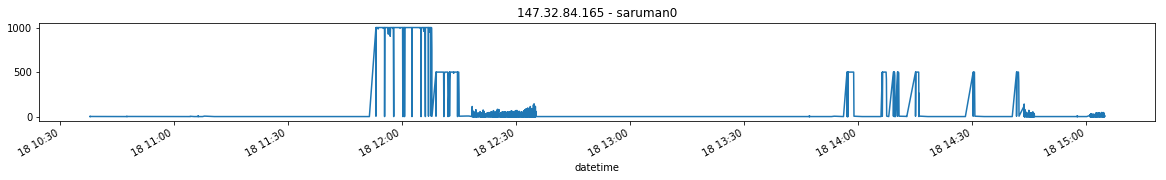

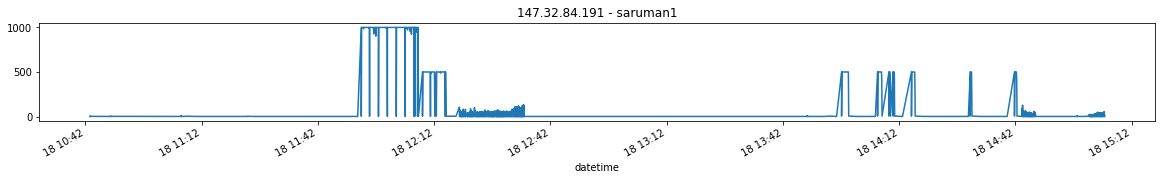

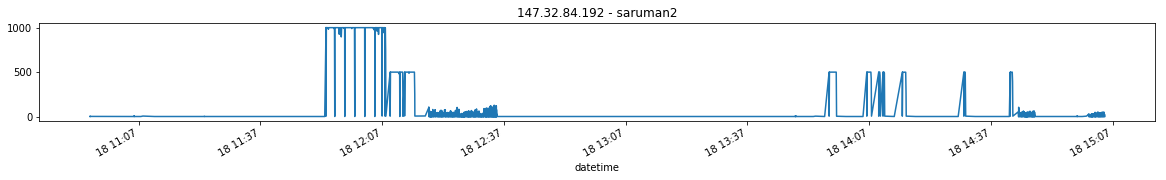

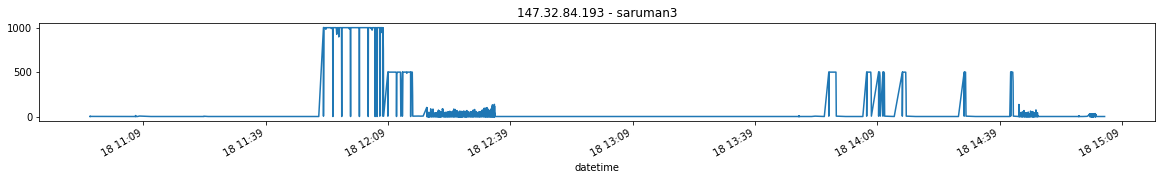

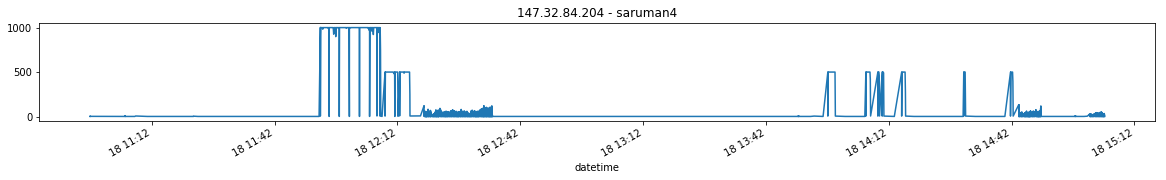

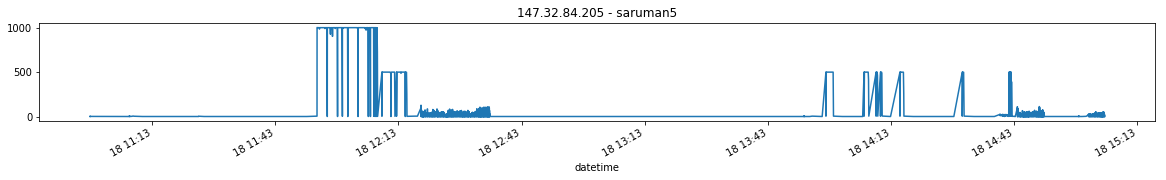

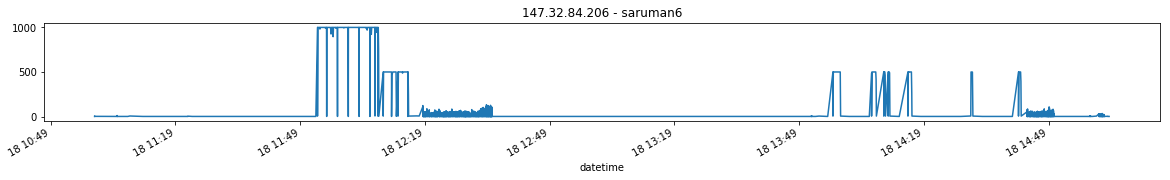

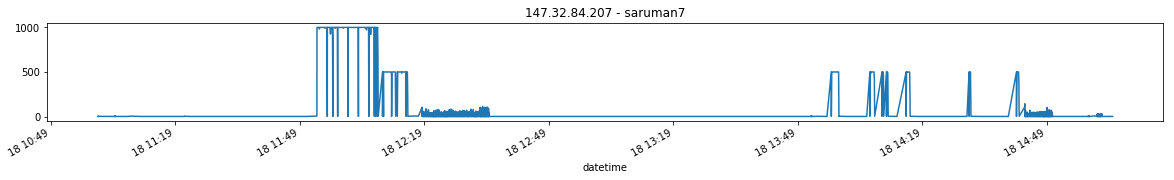

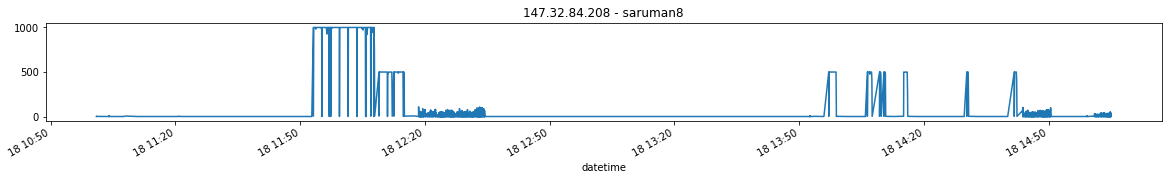

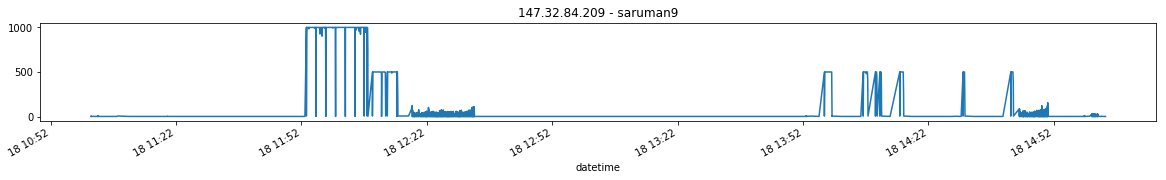

In [8]:
infected_hosts = ['147.32.84.165', '147.32.84.191', '147.32.84.192', '147.32.84.193', '147.32.84.204', '147.32.84.205', 
                 '147.32.84.206', '147.32.84.207', '147.32.84.208', '147.32.84.209']
host_name = ['saruman{}'.format(x) for x in range(0, 10)]

for idx, host in enumerate(infected_hosts):
    host_data = scenario_data.loc[scenario_data['src_ip'] == host] # Only take selected host src
    host_data = host_data[host_data.label != 'Background'] # Drop background
    host_data['packets'].plot(figsize=(20, 2), title='{} - {}'.format(host, host_name[idx]))
    plt.show()

### Normal - to host

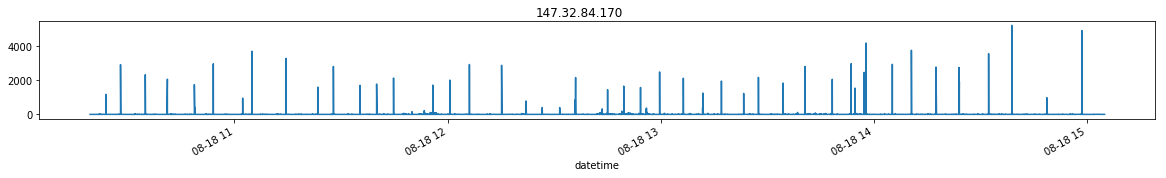

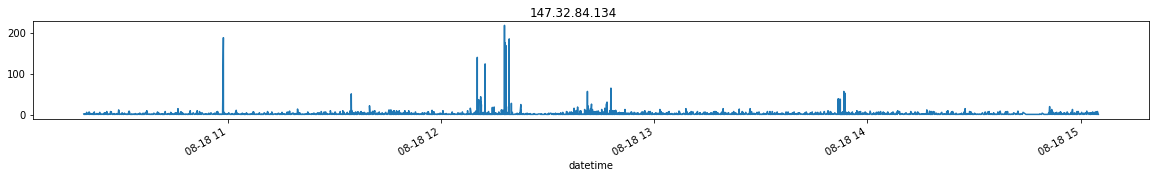

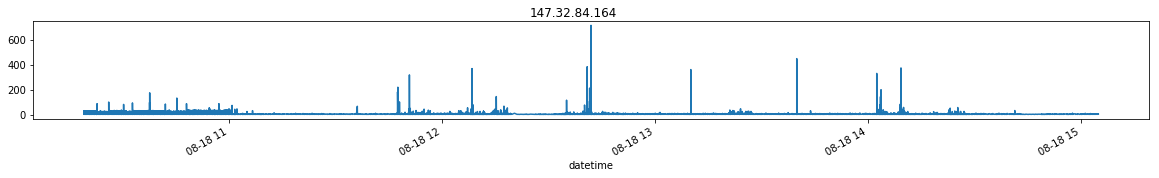

In [9]:
normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164']

for host in normal_hosts:
    host_data = scenario_data.loc[scenario_data['src_ip'] == host] # Only take selected host src
    host_data = host_data[host_data.label != 'Background'] # Drop background
    host_data['packets'].plot(figsize=(20, 2), subplots=True, title=host)
    plt.show()

### Discretization

In [10]:
def discretize_continuous_feature(distribution, current_window):
    """
    Discretize a single sliding window using percentiles,
    using the distribution achieved from current_slide
    
    distribution: dictionary, {
       <feature_name>: (lower_percentile, top_percentile)
    }
    """
    discretized = []
    for element in current_window:
        if element < distribution[0]:
            discretized.append(0)
        elif element > distribution[1]:
            discretized.append(2)
        else:
            discretized.append(1)
    return discretized

### Attribute mapping

In [11]:
def map_attribute(feature_vec: list, M_i: list):
    """
    Attribute mapping algorithm from Pellegrino et al.
    
    feature_vec: list features, so [(1) protocol, (2) discrete_packets]
    M_i: list of number of values for each feature
    
    """
    space_size = np.prod(n_values_per_feature)
    code = 0
    for i, a_i in enumerate(feature_vec):
        code += a_i * (spaces_size / M_i[i])
        spaces_size = space_size / M_i[i]
    return code

### Discretize all hosts in "streaming"

In [16]:
"""
BEGIN PARAMETERS
"""
sliding_window_size = 20
"""
END PARAMETERS
"""

def window(seq, n=2):
    """
    Returns a sliding window (of width n) over data from the iterable
     s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...   
    
    https://stackoverflow.com/questions/6822725/rolling-or-sliding-window-iterator
    """            
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result


def find_percentiles(data: list) -> dict:
    """
    Find lower and upper percentiles for an array
    """
    pass

def find_n_different_values_discrete(data: list):
    """
    Find the length of a set of the data
    """
    return len(set(data))

# TODO find distribution from sampling hashing
distribution = {
    'host1': {
        'feature_name': (3, 10)
    }
}

# Todo get n different values 
n_different_values = [3, 3]

featured_hosts = {}
for idx, host in enumerate(infected_hosts):
    host_data = scenario_data.loc[scenario_data['src_ip'] == host] # Only take selected host src
    codes_list = []  # Code for each time point
    for w in window(host_data, sliding_window_size):
        d = discretize_continuous_feature(distribution[host], w)
        c = map_attribute(d, n_different_values)
        codes_list.append(c)
    host_data['_feature'] = codes_list
    featured_hosts[host] = host_data

IndentationError: expected an indented block (<ipython-input-16-24962c976727>, line 34)

### Plot discretization

In [ ]:
for idx, host in enumerate(featured_hosts):
    host_data['_feature'].plot(figsize=(20, 2), title='{} - {}'.format(host, host_name[idx]))
    plt.show()

## Task 4

In [ ]:
from hmmlearn import hmm

# Learn probablistic model from one infected host
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

for w in window(host_data, sliding_window_size):
    score = model.score(w)
    if score > threshold:
        # mark as not matching profile
        pass
    else:
        # mark as matching profile
        pass